In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot') # для красоты графиков

In [17]:
# Функция в качестве аргумента принимает путь к файлу, загружает его и другие файлы в датасет, объединяет их, 
# создает промежуточную таблицу и рассчитывает метрики
def metrics_recalculation(file_path):
    '''Функция в качестве аргумента принимает путь к файлу, загружает его и другие файлы в датасет, объединяет их, создает промежуточную таблицу и рассчитывает метрики CR и ARPU'''    
    added_users_df2 = pd.read_csv(file_path) # загрузка нового датасета для функции
    url = 'https://getfile.dokpub.com/yandex/get/' #вспомогательная строка для загрузки с Яндекс Диска
    groups2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ar-davydov/Проект_2_groups.csv', sep = ';') # загрузка датасетов для функции, я ЯД не грузится - превышен лимит скачиваний
    df2 = pd.concat([groups2, added_users_df2], ignore_index=True) # объединение строк датасетов
    active_studs2 = pd.read_csv(url + 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ') # загрузка датасетов для функции
    #checks2 = pd.read_csv(url + 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA', sep =';') # загрузка датасетов для функции
    checks2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ar-davydov/Проект_2_checks.csv', sep = ';')
    # Объединение датасетов
    full_df2 = df2.merge(checks2, left_on='id', right_on='student_id', how = 'outer').merge(active_studs2, left_on='id', right_on='student_id', how = 'outer')
    # Промежуточная таблица для расчета метрик. Код взят из EDA, поэтому есть ненужные здесь артефакты
    tab = full_df2.query('student_id_y > 0') \
                .groupby('grp') \
                .agg({'rev':['sum', 'mean', 'median', 'count'], 'student_id_y' : 'count' }) \
                .rename(columns = {'sum' : 'сумма_дохода', 'mean' : 'ср_арфм_доход_с_акт_юзера', 'median': 'медиана_ср_дода_с_акт_юзера', 'count': 'число_оплативших_акт_юзеров/число_акт_юзеров'}) \
                .reset_index() 
    
    # Расчет метрик    
    CR_metric = round(tab['rev']['число_оплативших_акт_юзеров/число_акт_юзеров']  / tab['student_id_y']['число_оплативших_акт_юзеров/число_акт_юзеров'] * 100, 2)    
    ARPU = round(full_df2.query('student_id_y > 0').groupby('grp').agg({'rev': 'mean'}), 2)
     
    
    # Возращаем словарь с 2 метриками и значениями по группам, series и датафрейм
    return { "Конверсия активного пользователя в покупателя по группам, 0 - группа А, 1 - группа В (в %):" : 
            CR_metric, 
            'Средний арифметический доход с 1 активного юзера по группам': ARPU}

In [18]:
# смотрим документацию функции
metrics_recalculation.__doc__

'Функция в качестве аргумента принимает путь к файлу, загружает его и другие файлы в датасет, объединяет их, создает промежуточную таблицу и рассчитывает метрики CR и ARPU'

In [19]:
# Применяем функцию, сохраняем полученный словарь  в recalculated_metrics для следующей функции, рисующей графики
recalculated_metrics =  metrics_recalculation('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ar-davydov/Проект_2_group_add.csv')
recalculated_metrics 

{'Конверсия активного пользователя в покупателя по группам, 0 - группа А, 1 - группа В (в %):': 0    5.07
 1    4.62
 Name: число_оплативших_акт_юзеров/число_акт_юзеров, dtype: float64,
 'Средний арифметический доход с 1 активного юзера по группам':          rev
 grp         
 A     933.59
 B    1257.88}

In [26]:
# Функция с 1 аргументом - видом метрики: конверсия или средний доход на 1 пользователя
def plot_bar_CR_or_ARPU(metrics_type):
    '''Функция для визуализации метрик, в качестве аргумента необходимо указать Конверсия или ARPU'''   

        # Добавляем заголовок и метки осей
    if metrics_type == 'Конверсия':
            plt.title('Конверсия активного пользователя в покупателя по группам, %')
            plt.ylabel('Проценты')
            x = ['группа A', 'группа B'] # названия столбцов и остальное потом
            
            y = recalculated_metrics['Конверсия активного пользователя в покупателя по группам, 0 - группа А, 1 - группа В (в %):'][0], \
               recalculated_metrics['Конверсия активного пользователя в покупателя по группам, 0 - группа А, 1 - группа В (в %):'][1]
            # Создаем график в виде столбцов
            plt.bar(x, y, color= ['cyan', 'pink'])    
            # Добавляем цифры на график
            for i in range(len(x)):
                plt.text(x[i], y[i], str(y[i]))
            # Отображаем график
            plt.show()
    elif metrics_type == 'ARPU':
            plt.title('ARPU')
            plt.ylabel('условные единицы') 
            x = ['группа A', 'группа B'] # названия столбцов и отсальное потом
            y = recalculated_metrics['Средний арифметический доход с 1 активного юзера по группам'].rev[0], \
               recalculated_metrics['Средний арифметический доход с 1 активного юзера по группам'].rev[1]
            # Создаем график в виде столбцов
            plt.bar(x, y, color= ['cyan', 'pink'])    
            # Добавляем цифры на график
            for i in range(len(x)):
                plt.text(x[i], y[i], str(y[i]))
            # Отображаем график
            plt.show() 
    else:
            print("Для корректного построения графика введите 'Конверсия' или 'ARPU' в качестве аргумента")
            return 


        

In [27]:
plot_bar_CR_or_ARPU.__doc__

'Функция для визуализации метрик, в качестве аргумента необходимо указать Конверсия или ARPU'

Проверка работы функции

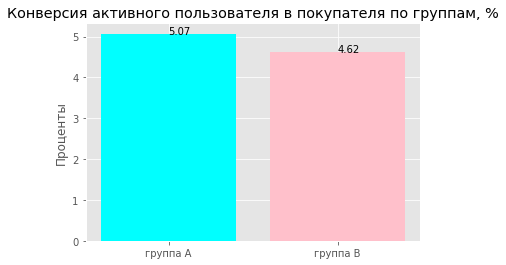

In [28]:
# Применяем новую функцию. Конверсия.
plot_bar_CR_or_ARPU('Конверсия')

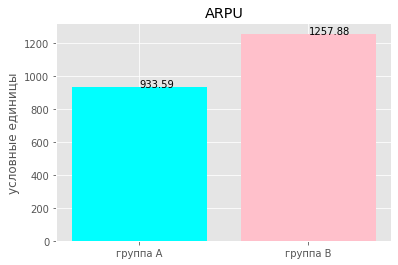

In [29]:
# Применяем новую функцию. ARPU
plot_bar_CR_or_ARPU('ARPU')

In [30]:
# Применяем новую функцию. Опечатка - получаем то, что должны ввести.
plot_bar_CR_or_ARPU('ARPUв')

Для корректного построения графика введите 'Конверсия' или 'ARPU' в качестве аргумента


In [31]:
# Применяем новую функцию. Не введен аргумент - ошибка
plot_bar_CR_or_ARPU()

TypeError: plot_bar_CR_or_ARPU() missing 1 required positional argument: 'metrics_type'

In [32]:
# Применяем новую функцию.
# Здесь уже подскажет сам питон: "NameError: name 'sds' is not defined"
plot_bar_CR_or_ARPU(sds)

NameError: name 'sds' is not defined

In [33]:
# Применяем новую функцию.
# Здесь уже подскажет сам питон: "SyntaxError: EOL while scanning string literal"
plot_bar_CR_or_ARPU('sds)

SyntaxError: EOL while scanning string literal (<ipython-input-33-45386b1e6744>, line 3)